In [61]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [62]:
# Load and preprocess the Fashion MNIST dataset composed of 28x28 images
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0


In [64]:
# Print some of the data 
train_df = pd.DataFrame({'Image': train_images.tolist(), 'Label': train_labels.tolist()})

print("Train Data:")
print(train_df.head())


Train Data:
                                               Image  Label
0  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...      9
1  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.00392156862745098...      0
2  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...      0
3  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.12...      3
4  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...      0


In [65]:
# Build the model
model = Sequential([
    Flatten(input_shape=(28, 28)),  
    Dense(1000, activation='relu'),
    Dense(10, activation='softmax')  
])

In [66]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [67]:
# Train, Evaluate and make predictions on the model
model.fit(train_images, train_labels, epochs=10, validation_split=0.6)

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

predictions = model.predict(test_images)


Epoch 1/10
750/750 [==============================] - 12s 16ms/step - loss: 0.5523 - accuracy: 0.8002 - val_loss: 0.4531 - val_accuracy: 0.8339
Epoch 2/10
750/750 [==============================] - 12s 15ms/step - loss: 0.4087 - accuracy: 0.8501 - val_loss: 0.4250 - val_accuracy: 0.8454
Epoch 3/10
750/750 [==============================] - 12s 16ms/step - loss: 0.3607 - accuracy: 0.8653 - val_loss: 0.3655 - val_accuracy: 0.8701
Epoch 4/10
750/750 [==============================] - 12s 16ms/step - loss: 0.3307 - accuracy: 0.8736 - val_loss: 0.3417 - val_accuracy: 0.8783
Epoch 5/10
750/750 [==============================] - 12s 15ms/step - loss: 0.3080 - accuracy: 0.8850 - val_loss: 0.3943 - val_accuracy: 0.8669
Epoch 6/10
750/750 [==============================] - 12s 16ms/step - loss: 0.2971 - accuracy: 0.8890 - val_loss: 0.3678 - val_accuracy: 0.8705
Epoch 7/10
750/750 [==============================] - 12s 15ms/step - loss: 0.2736 - accuracy: 0.8965 - val_loss: 0.3564 - val_accuracy:

In [68]:
# Plot the image in gray scale
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel(f"{class_names[predicted_label]} {100*np.max(predictions_array):2.0f}% ({class_names[true_label]})", color=color)

In [69]:
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

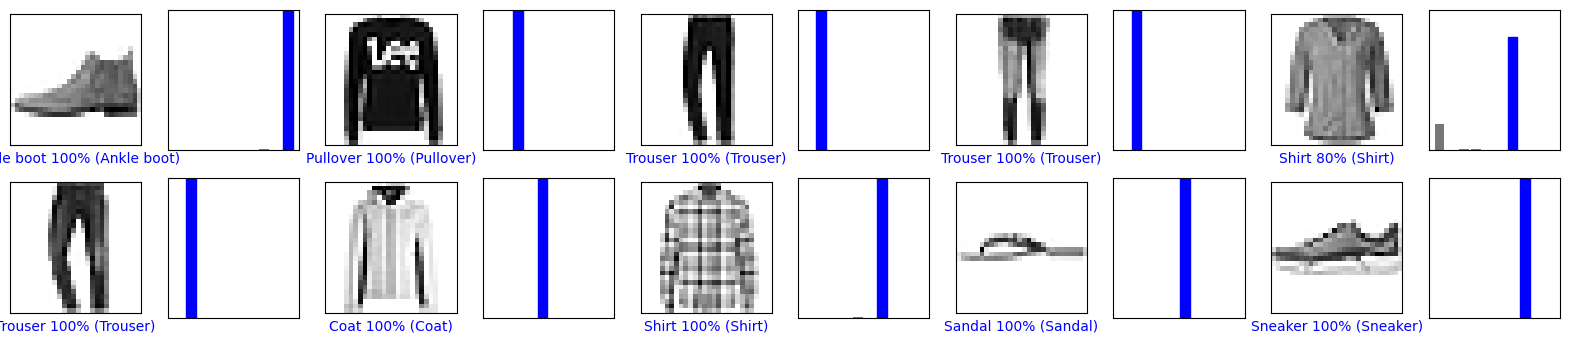

In [70]:
# Test the trained model
class_names = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]

num_rows = 2
num_cols = 5
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, predictions, test_labels)
plt.show()
